In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
upper_bounds_FE = []
lower_bounds_FE = []
grid_size = np.array([8, 16, 32, 64, 128, 256])
for N in grid_size:
    upper_bounds_FE.append(np.load(f'bounds/linear/A_u_fem_{N}.npy'))
    lower_bounds_FE.append(np.load(f'bounds/linear/A_l_fem_{N}.npy'))
upper_bounds_FE = np.array(upper_bounds_FE)
lower_bounds_FE = np.array(lower_bounds_FE)

In [32]:
upper_bounds_NN = []
lower_bounds_NN = []
par_size = np.array([65, 391])#, 1801, 6801, 26401])
for N in par_size:
    upper_bounds_NN.append(np.load(f'bounds/linear/A_u_NN_{N}.npy'))
    lower_bounds_NN.append(np.load(f'bounds/linear/A_l_NN_{N}.npy'))
upper_bounds_NN = np.array(upper_bounds_NN)
lower_bounds_NN = np.array(lower_bounds_NN)

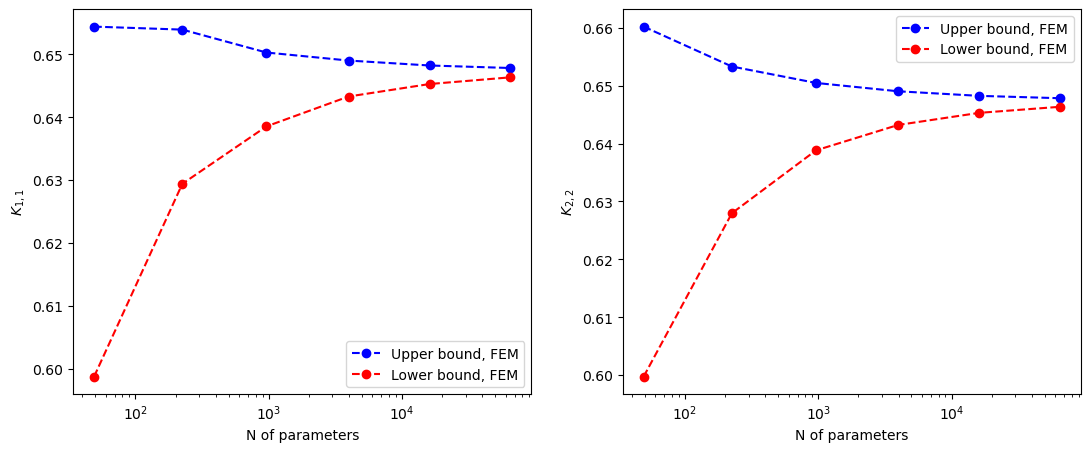

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

axs[0].plot((grid_size-1)**2, upper_bounds_FE[:,0,0], 'b--o')
axs[0].plot((grid_size-1)**2, lower_bounds_FE[:,0,0], 'r--o')
#axs[0].plot(par_size, upper_bounds_NN[:,0,0], 'b--*')
#axs[0].plot(par_size, lower_bounds_NN[:,0,0], 'r--*')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$K_{1,1}$')
axs[0].legend(['Upper bound, FEM', 'Lower bound, FEM', 'Primal estim., NN', 'Dual estim., NN'])
axs[0].set_xscale('log')

axs[1].plot((grid_size-1)**2, upper_bounds_FE[:,1,1], 'b--o')
axs[1].plot((grid_size-1)**2, lower_bounds_FE[:,1,1], 'r--o')
#axs[1].plot(par_size, upper_bounds_NN[:,1,1], 'b--*')
#axs[1].plot(par_size, lower_bounds_NN[:,1,1], 'r--*')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$K_{2,2}$')
axs[1].legend(['Upper bound, FEM', 'Lower bound, FEM', 'Primal estim., NN', 'Dual estim., NN'])
axs[1].set_xscale('log')